In [1]:
from utils import keys_to_counts, get_keys

In [2]:
import pandas as pd

data_path = "D:\\studium\\analyse\\data_prep\\src\\_2_preproc_pipeline_en\\data_preprocessed\\2_tokenize_us.csv"
df = pd.read_csv(data_path)

In [3]:
df.head()

,id,pub_year,text_preproc2
0,US020240139944A1,2024,arm operating system include control device pl...
1,US020240139768A1,2024,coating device corresponding coating process d...
2,US020240139853A1,2024,tip separation apparatus welding gun disclose ...
3,US020240139933A1,2024,device method controlled motion tool present i...
4,US020240139934A1,2024,teaching method program store medium execute t...


In [4]:
# vectorize the text data with tf-idf
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(min_df=20, max_df=0.9)

x_vec = vectorizer.fit_transform(df['text_preproc2'])

In [5]:
vectorizer.get_feature_names_out().__len__()

1736

In [6]:
# Define Search Param
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import GridSearchCV


search_params = {
    'n_components': [8],
    'learning_decay': [0.6]
}
# Init the Model
lda = LatentDirichletAllocation(max_iter=5, learning_method='online', learning_offset=50., random_state=0)
# Init Grid Search Class
model = GridSearchCV(lda, param_grid=search_params)
# Do the Grid Search
model.fit(x_vec)

GridSearchCV(estimator=LatentDirichletAllocation(learning_method='online',
                                                 learning_offset=50.0,
                                                 max_iter=5, random_state=0),
             param_grid={'learning_decay': [0.6], 'n_components': [8]})

In [7]:
# Best Model
best_lda_model = model.best_estimator_
# Model Parameters
print("Best Model's Params: ", model.best_params_)
# Log Likelihood Score
print("Best Log Likelihood Score: ", model.best_score_)
# Perplexity
print("Model Perplexity: ", best_lda_model.perplexity(x_vec))

Best Model's Params:  {'learning_decay': 0.6, 'n_components': 8}
Best Log Likelihood Score:  -692924.5308594698
Model Perplexity:  465.4696900440025


#### 1
```
Best Model's Params:  {'learning_decay': 0.7, 'n_components': 4}
Best Log Likelihood Score:  -744378.7146935398
Model Perplexity:  579.4436712246056
```
#### 2
```
Best Model's Params:  {'learning_decay': 0.6, 'n_components': 8}
Best Log Likelihood Score:  -692924.5308594698
Model Perplexity:  465.4696900440025

vectorizer = CountVectorizer(min_df=20, max_df=0.9)
```



In [8]:
lda_output = best_lda_model.transform(x_vec)

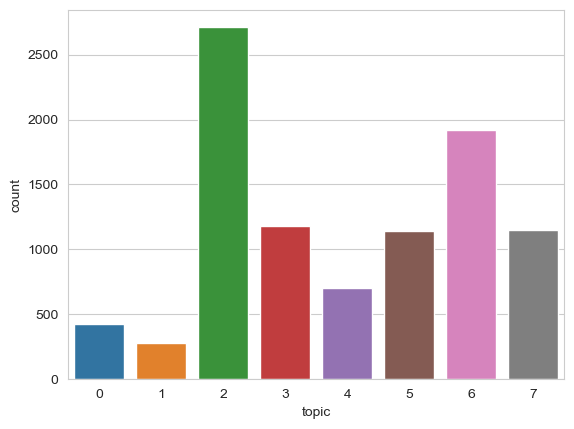

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

lda_keys = get_keys(lda_output)
lda_categories, lda_counts = keys_to_counts(lda_keys)

topics_df_lda = pd.DataFrame({'topic' : lda_categories, 'count' : lda_counts})
sns.barplot(x=topics_df_lda['topic'], y = topics_df_lda['count'])
plt.show()

In [10]:
import numpy as np

# Show top n keywords for each topic
def show_topics(vectorizer, lda_model, n_words=10):
    keywords = np.array(vectorizer.get_feature_names_out())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords
topic_keywords = show_topics(vectorizer=vectorizer, lda_model=best_lda_model, n_words=15)
# Topic - Keywords Dataframe
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords

,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14
Topic 0,unit,apparatus,transfer,module,substrate,include,processing,workpiece,control,device,system,configure,chamber,inspection,second
Topic 1,system,force,patient,charge,manipulator,method,battery,joint,actuator,surgical,candidate,surgery,provide,control,segment
Topic 2,control,method,object,image,base,sensor,include,information,position,device,determine,datum,system,target,point
Topic 3,drive,end,second,arm,include,effector,assembly,axis,motor,connect,joint,mechanism,shaft,couple,configure
Topic 4,system,vehicle,storage,item,container,include,configure,transport,station,plurality,delivery,location,pick,product,method
Topic 5,surface,body,member,include,cleaning,portion,configure,provide,device,clean,main,plate,support,second,wheel
Topic 6,system,method,user,device,datum,include,base,control,task,provide,perform,process,model,receive,generate
Topic 7,tool,system,surgical,arm,device,include,instrument,configure,component,position,comprise,couple,portion,end,control


In [11]:
#this is by far the easiest way to load a pre-trained sklearn lda model onto pyLDAvis
#there are other means of using this visible on pyLDAvis' main repo

import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

feature_names = vectorizer.get_feature_names_out()

vectorizer.get_feature_names = lambda: feature_names

display_data = pyLDAvis.sklearn.prepare(best_lda_model, #our pre-trained LDA model
                         x_vec, #this gives us our document-term matrix
                        vectorizer) #the vectoriser object
                        
pyLDAvis.display(display_data)  

C:\Users\paul-\anaconda3\envs\ml_angew_programm\lib\site-packages\pyLDAvis\_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(
